# Сборный проект № 1: Аналитика интернет-магазина "Стримчик"

В нашем распоряжении исторические данные из открытых источников о продажах игр, оценках пользователей и экспертов, жанры и платформы. 

**Цель исследования:** необходимо выявить закономерности, определяющие успешность игры, для выявления потенциально популярного продукта и грамотного планирования рекламных кампаний в нашем интернет-магазине.

**Ход исследования:** \
Шаг 1 - Загрузка и изучение общей информации; \
Шаг 2 - Предобработка данных; \
Шаг 3 - Исследовательский анализ данных; \
Шаг 4 - Портрет пользователя каждого региона; \
Шаг 5 - Проверка гипотез; \
Общий вывод.

## Шаг 1. Загрузка данных

Загружаем библиотеки, которые понадобятся в нашем исследовании

In [1]:
import pandas as pd # импоритруем pandas для обработки, анализа и структурирования данных
import numpy as np # импоритруем numpy для работы с данными
import matplotlib.pyplot as plt # так же импоритруем matplotlib.pyplot для будущего построения графиков
import seaborn as sns # так же импоритруем seaborn для построения графиков
from scipy import stats as st # импоритруем stats из библиотеки scipy для проверки гипотез и проведения t-тестов
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)

### 1.1 Загрузим данные из csv-файла в датафрейм c помощью библиотеки pandas

In [2]:
try: # открываем наш файл с данными в среде JupiterHUB:
    data = pd.read_csv('/datasets/games.csv') # представлена информация о продажах игр за 2016 год.
except: # либо берем данные на ПК для локальной версии Jupiter:
    data = pd.read_csv('C://Users//Voova//datasets//games.csv') 

### 1.2 Изучим общую информацию о датафрейме. Выведим первые строки набора данных.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Перед нами датафрейм на **11** колонок и **16 715** строк, сразу могу сказать, что в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_score`, `Rating` имеются пропущенные значения, так же видно, что названия столбцов указаны не корректно. \
Посмотрим первые 10 строчек таблицы:

In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Типом данных столбца `Year_of_Release` является `float`, тогда как правильно было бы указать `int`, так как значение года не дробное. \
А так же тип данных столбца `User_Score` является `object` из-за наличия в столбце аббревиатуры `tbd`, то есть - `To Be Determined`, что переводится как - "Будет определено". В нашем случае `tbd` это такие же пропуски в данных, что и `NaN`. \
Замечу, что в столбце `Critic_Score` критики выставляют всегда целую оценку, тип данных этого столбца так же подлежит замене.\
Возможно в остальных столбцах пропущенные данные так же относятся к `tbd` и на момент выгрузки нашего датафрейма - не все игры получили свою оценку и рейтинг. \
Этим мы займемся на этапе предобработки данных. 

### Вывод:
В предоставленном нам датафрейме имеется **11** колонок и **16 715** строк, для корректного исследования необходимо обработать данные, а именно:
- привести названия столбцов к нижнему регистру;
- проверить датафрейм на явные/неявные дубликаты;
- разобраться с пропущенными значениями в столбцах;
- преобразовать данные в нужные типы.

## Шаг 2. Предобработка данных

### 2.1 Приведем названия столбцов к нижнему регистру. 

In [5]:
data.columns = data.columns.str.lower()

In [6]:
# проверим результат: 
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2 Проверим датафрейм на явные/неявные дубликаты:

In [7]:
data.duplicated().sum() # суммируем количество явных дубликатов

0

Явные дубликаты в наших данных не обнаружены. 

- В столбцах `rating`, `genre`, `platform`, `name` могут встречаться неявные дубликаты, проверим эти столбцы:

In [8]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

В столбце `rating` неявные дубликаты не обнаружены. 

In [9]:
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

В столбце `genre` неявные дубликаты не обнаружены. 

In [10]:
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

В столбце `platform` неявные дубликаты не обнаружены. 

In [11]:
len(data['name'].unique()) # посчитаем количество игр в нашей таблице

11560

**11 560** игр - немаленькое количество. 

In [12]:
data['name'].sort_values().unique()

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'wwe Smackdown vs. Raw 2006', '¡Shin Chan Flipa en colores!',
       nan], dtype=object)

При просмотре уникальных значений столбца `name` хочу обратить внимание, что встречаются названия, перед которыми стоит пробел, предлагаю удалить лишние пробелы перед и после названий игр.

In [13]:
data['name'] = data['name'].str.strip() # используем функцию str.strip()

Понимаю, что использование "визуального" поиска неявных дубликатов имеет очень маленький КПД на больших объемах данных, но всё же я в процессе поиска установил параметры `pd.set_option('display.max_columns', None)` и `pd.set_option('display.max_rows', None)`. 

In [14]:
data['name'].sort_values(ascending = False)

9134     ¡Shin Chan Flipa en colores!
475        wwe Smackdown vs. Raw 2006
15612    uDraw Studio: Instant Artist
8280     uDraw Studio: Instant Artist
645                      uDraw Studio
                     ...             
7087     .hack//G.U. Vol.2//Reminisce
8342       .hack//G.U. Vol.1//Rebirth
4728                      '98 Koshien
659                               NaN
14244                             NaN
Name: name, Length: 16715, dtype: object

И, пролистав глазами все названия игр, могу сказать, что неявных дубликатов в столбце `name` обнаружено небыло. 

### 2.3 Обработаем пропущенные значения в столбцах:

In [15]:
data.isna().sum() # воспользуемся функцией .isna() и просуммируем пропущенные значения по каждому столбцу 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

- В столбцах `name` и `genre` присутствует по **2** пропущенных значения, что составляет **0,01 %** от общего количества строк - удаляем эти строки. 

In [16]:
data.dropna(subset = ['name'], inplace = True)
data.dropna(subset = ['genre'], inplace = True)

- В столбце `year_of_release` имеется **269** пропущенных значений, что составляет **1,6 %** от общего количества строк - посмотрим на эти строки:

In [17]:
data.query('year_of_release.isna()') # используем метод получения срезов .query()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Хотя в названиях некоторых игр присутствует значение года - мы не можем достоверно утверждать, что игра вышла в соответствии с годом в её названии, т.к. игры на разных платформах выходят в разное время. \
Как пример - игра `Madden NFL 2004`вышла 12 августа **2003** года. \
Поэтому на цифры в названиях мы не будем акцентировать внимание и пропущенные значения в столбце `year_of_release` удаляем:

In [18]:
data.dropna(subset = ['year_of_release'], inplace = True)

- В столбце `critic_score` имеется **8578** пропущенных значений, что составляет **51,3 %** от общего количества строк - посмотрим на эти строки:

In [19]:
data.query('critic_score.isna()') # используем метод получения срезов .query()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Не представляю возможным заменить пропуски данных в этом столбце на среднее или медиану, т.к. у нас абсолютно разные игры, выпущенные в разное время, на разных платформах. 

In [20]:
data['critic_score'].sort_values().unique() # посмотрим, какие оценки выставляют критики:

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

Игры, имеющие оценку от критиков, не получали менее 13 баллов, поэтому пропуски данных можно заменить на 0, чтобы мы видели из общей выборки - какие данные были пропущены. 
\
Оставим NaN, т.к. при математических операциях NaN заменяет 0, посмотрим что из этого получится далее.

- В столбце `user_score` имеется **6701** пропущенное значение, что составляет **40,1 %** от общего количества строк.\
А так же 2280 оценок с маркером `tbd`. По аналогии с предыдущим столбцом заменить на медиану или среднее мы не можем, заменим tbd на NaN.

In [21]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

- В столбце `rating` имеется **6766** пропущенное значение, что составляет **40,4 %** от общего количества строк.\
По аналогии с предыдущими столбцами заменить на медиану или среднее мы не можем, предлагаю заменить пропуски значением `unknown`.

In [22]:
data['rating'] = data['rating'].fillna('unknown')

In [23]:
data.isna().sum() # снова проверим наш датафрейм на количество пропущенных значений:

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

- Пропуски в данных отсутствуют, за исключением столбца `critic_score`, обычно мы стараемся заполнить все данные, но ведь это *не всегда обязательно*, правда ?\
*Касательно природы пропусков:*
- Сначала я предположил, что пропуски в  столбцах оценки критиков, пользователей и рейтинге относятся к периоду раньше 1994 года, т.к. организация **Entertainment Software Rating Board (ESRB)** занимающаяся выставлением рейтинга была основана в 1994 году, но после детального рассмотрения я увидел, что это не так и пропуски есть во всем периоде до 2016 года, поэтому:
- По моему мнению, пропуски в данных могли появиться в следствие технической ошибки при выгрузке/загрузке данных и обработки информации из разных открытых источников, а так же не стоит упускать значение человеческого фактора - могли быть взяты попросту неактуальные источники данных или заведомо неполные.

### 2.4 Преобразуем данные в нужные типы:  

Как уже говорилось ранее, приведем значения столбца `year_of_release` к типу `int`.

In [24]:
data['year_of_release'] = data['year_of_release'].astype(int) # используем функцию .astype()
data['year_of_release'].head() # проверим преобразование

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int32

Ранее я отмечал, что в столбце `critic_score` критики выставляют всегда целую оценку, и тип данных этого столбца так же подлежит замене, однако когда я оставил в нем пропуски - тип данных `float` не подлежит изменениям из за `NaN`. 

Так как мы занулили пропуски и `tbd` в столбце `user_score` - можем заменить тип данных на `float`.

In [25]:
data['user_score'] = data['user_score'].astype(float)

In [26]:
data.info() # ещё раз взгляним на общую информацию по таблице:

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


- Получили датафрейм на **16 444** строки, типы данных корректные. 

### 2.5 Добавим столбец с суммарными продажами по всем регионам:  

In [27]:
data['total_sales'] = data.loc[:,['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1) # параметр (axis=1) указывает, 
#что суммирование идет построчно
data.sample(5) # посмотрим на рандомные 5 строк таблицы

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
10567,Scribblenauts Unmasked: A DC Comics Adventure,WiiU,2013,Puzzle,0.09,0.00,0.0,0.01,71.0,6.3,E10+,0.10
13049,Cities in Motion,PC,2011,Simulation,0.00,0.04,0.0,0.01,70.0,7.7,E,0.05
10550,Heavy Fire: Afghanistan,Wii,2011,Shooter,0.09,0.00,0.0,0.01,NaN,NaN,T,0.10
540,The Sims,PS2,2003,Simulation,1.41,1.12,0.0,0.24,83.0,7.7,T,2.77
1738,Destruction Derby 2,PS,1996,Racing,0.65,0.44,0.0,0.08,NaN,NaN,unknown,1.17


In [28]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum() #Проверяю количество неявных дубликатов по трем столбцам:

1

Одна строчка дублируется по имени, платформе и году релиза, посмотрим на неё:

In [29]:
data[data.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E,0.01


In [30]:
data = data.drop(index = 16230) # удаляем строку по индексу

In [31]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum() # финальная проверка на дубликаты

0

### Вывод:
На этапе предобработки данных мы:
- Привели названия столбцов к нижнему регистру;
- Проверили датафрейм на наличие явных и неявных дубликатов, дубликаты не обнаружены;

Обработали пропущенные значения в столбцах: 
- В столбцах `name` и `genre` удалено **2** строки, что составляет **0,01 %** от общего количества строк. 
- В столбце `year_of_release` удалено **269** строки, что составляет **1,6 %** от общего количества строк.
- В столбце `critic_score` оставлено **8461** пропущенное значение, что составляет **51,5 %** от общего количества строк. Заменить пропуски на среднее значение или медиану мы не можем.  
- В столбце `user_score` оставлено **8981** пропущенное значение, что составляет **53,7 %** от общего количества строк.\
В данном столбце `tbd` преобразованы в *NaN*.
- В столбце `rating` обработано **6766** пропущенное значение, что составляет **40,5 %** от общего количества строк.\
По аналогии с предыдущими столбцами заменить на медиану или среднее мы не можем, поэтому пропуски заменены значением `unknown`.

Пропуски в данных могли появиться в следствие технической ошибки при выгрузке/загрузке данных и обработки информации из разных открытых источников, а так же не стоит упускать значение человеческого фактора - могли быть взяты попросту неактуальные источники данных или заведомо неполные. 

- Добавили столбец с суммарными продажами игр по всем регионам.
- Произвели поиск неявных дубликатов по совпадению названия, платформы и года релиза - удалена одна дублирующаяся строка. 


## Шаг 3. Исследовательский анализ данных

### 3.1 Посмотрим, сколько игр выпускалось в разные годы:

In [32]:
( # используем сводную таблицу:
    data
    .pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
    .sort_values(by = 'year_of_release', ascending = False)
)

,name
year_of_release,
2016,502
2015,606
2014,581
2013,544
2012,652
...,...
1984,14
1983,17
1982,36


Как видно по данным из таблицы выше: 80-е года 20-го века являются колыбелью игровой индустрии, в 1980 году было выпущего всего 9 игр, тогда как всего через 20 лет, в 2000 году их количество увеличивается в 39 раз до 350 игр в год. \
Посмотрим эти же данные на гистограмме:

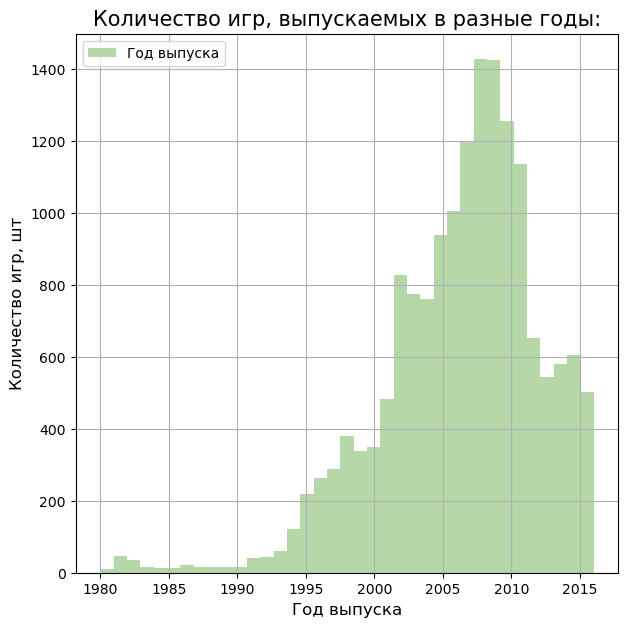

In [33]:
( # построим гистограмму методом .plot()
    data
    .plot(kind ='hist', y = 'year_of_release', histtype = 'bar', alpha = 1, label = 'Год выпуска', grid = True, bins = 37, figsize=(7, 7), color = '#B6D7A8')
)
plt.title('Количество игр, выпускаемых в разные годы:', size=15)
plt.xlabel('Год выпуска', size=12)
plt.ylabel('Количество игр, шт', size=12)
plt.show()

- Актуальными для нас данными, по моему мнению, являются игры, выпущенные в продажу не позднее 5 лет назад. \
Такой срок связан с тем, что рынок гейминга идет вперед огромными шагами - проследим на гистограмме:
- Период 1980-1994 годы - зарождение игровой индустрии, далеко не каждый может себе позволить приставку или тем более собственный домашний компьютер. 
- Период 1995-2010 годы - разгон игровой индустрии, т.к. домашние ПК появляются в каждом доме, приставки и консоли распространяются большими темпами. 
- Период 2011-2016 годы - бОльшая часть гейм индустрии идет в онлайн, огромную часть начинает занимать мобильный гейминг с появлением смартфонов, т.к. эти данные у нас не учтены - на нашей гистограмме виден спад.
- Дальше дополнительная реальность и ИИ-ассистенты, а в скором времени и игры от ИИ. Поэтому нет смысла слишком далеко оглядываться назад.

### 3.2 Посмотрим, как менялись продажи по платформам

In [34]:
( # используем сводную таблицу .pivot_table():
    data
    .pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
    .sort_values(by = 'total_sales', ascending = False)
)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
...,...
WS,1.42
TG16,0.16
3DO,0.10


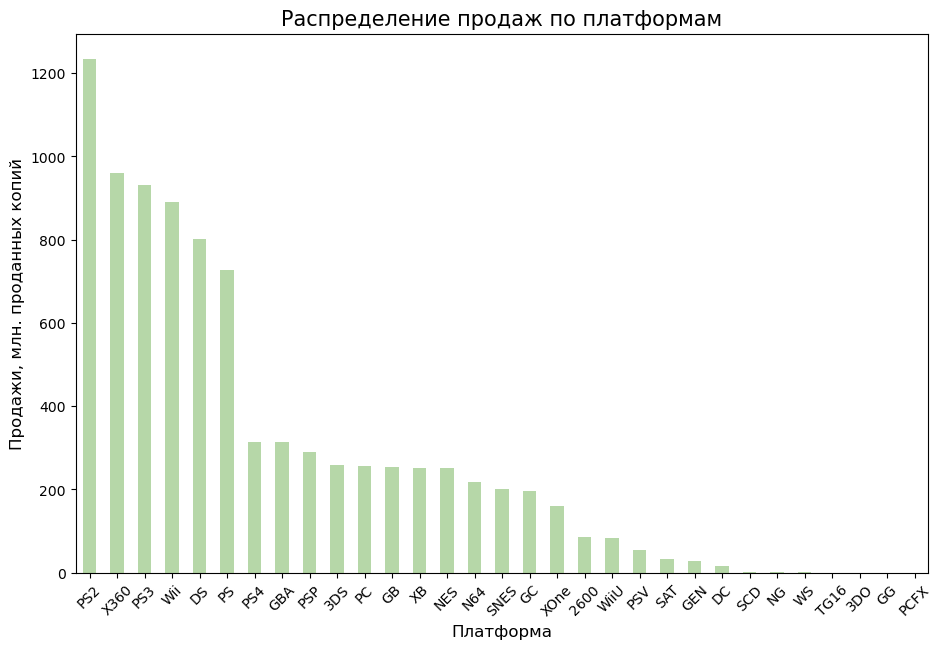

In [35]:
( # построим диаграмму методом .plot()
    data
    .groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending = False)
    .plot(kind='bar', figsize=(11, 7), color = '#B6D7A8')
)
plt.xticks(rotation=45)
plt.title('Распределение продаж по платформам', size=15)
plt.xlabel('Платформа', size=12)
plt.ylabel('Продажи, млн. проданных копий', size=12)
plt.show()

3.2.1 Выберим платформы с наибольшими суммарными продажами и построим распределение по годам.

На диаграмме выше мы отчетливо видим, что лидирующее место по продажам занимает 6 платформ, построим по ним распределение по годам.\
Обозначим новую переменную с лидирующими платформами как `top_six`.

In [36]:
top_six = ( # используем сводную таблицу:
    data
    .pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
    .sort_values(by = 'total_sales', ascending = False)
    .head(6)
    .reset_index()
)

top_six

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58


In [37]:
# теперь выведем список наших топовых платформ, чтобы построить на графике распределение платформ по годам
top_six_list = top_six['platform'].tolist()
top_six_list

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

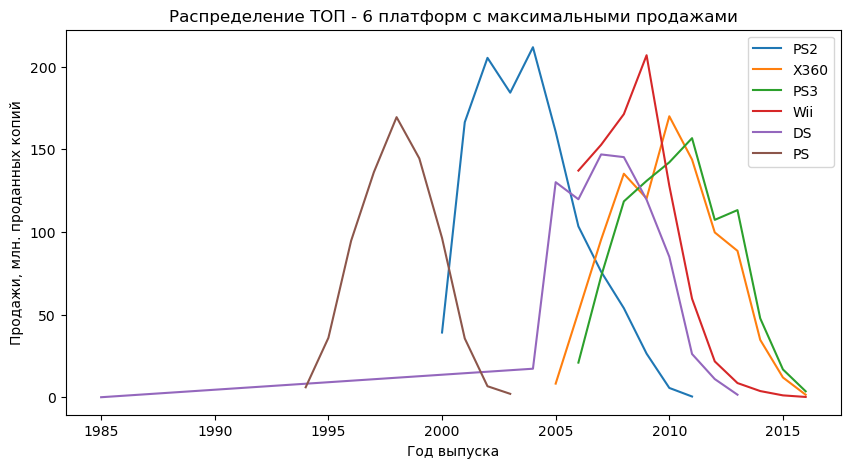

In [38]:
for index in top_six_list:
    (
    data.query('platform == @index')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(figsize = (10, 5), label = index)
    )
    plt.title('Распределение ТОП - 6 платформ с максимальными продажами')
    plt.xlabel('Год выпуска')
    plt.ylabel('Продажи, млн. проданных копий')
    plt.legend() 

На графике виден выброс `фиолетовая линия` платформы `Nintendo DS` показывает, что у платформы были продажи в *1985* году, однако платформа вышла в *2004* году, значит имеет место ошибка в исходных данных. 

In [39]:
# возьмем срез по платформе DS и году выброса, чтобы посмотреть данные:
data.query('platform == "DS" and year_of_release < 1986')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02


Предлагаю удалить эту строку, т.к. тут явно перепутана платформа и соответственно учитываются продажи другой платформы. 

In [40]:
data = data.drop(index = 15957) # удаляем строку по индексу

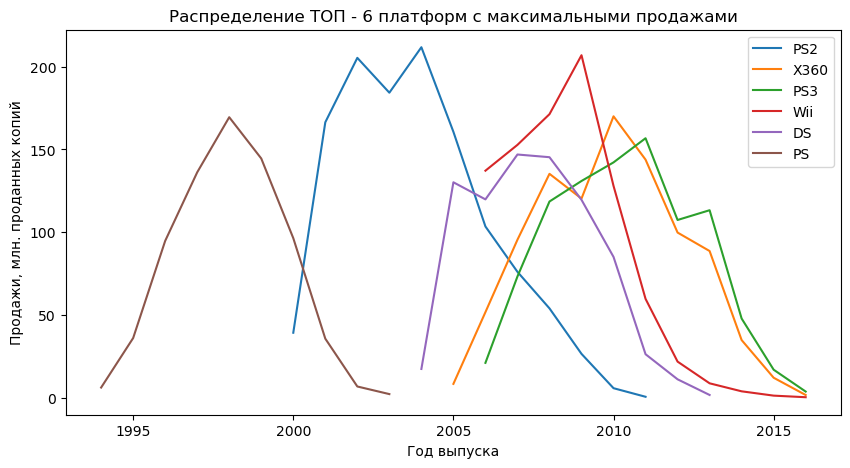

In [41]:
# снова посмотрим на наше распределение без выброса (для визуализации строку можно было и не удалять, а поставить 
#условие `year_of_release > 1990` в .query() ) 
for index in top_six_list:
    (
    data.query('platform == @index')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(figsize = (10, 5), label = index)
    )
    plt.title('Распределение ТОП - 6 платформ с максимальными продажами')
    plt.xlabel('Год выпуска')
    plt.ylabel('Продажи, млн. проданных копий')
    plt.legend() 

3.2.2 Посмотрим, за какой характерный срок появляются новые и исчезают старые платформы

На графике не совсем наглядно прослеживается жизненный цикл платформ (как мне кажется срок около 8 лет), но мы можем посчитать медиану разницы между поздним и ранним годом выпуска игр на платформе: 

In [42]:
lifetime_svod =(
    data
    .pivot_table(index = 'platform', values = 'year_of_release', aggfunc = ['min', 'max'])
    .reset_index()
)
lifetime_svod['lifetime'] = lifetime_svod['max'] - lifetime_svod['min'] # добавляем в сводную столбец с продолжиетльностью жизни отдельных платформ
print( 'В среднем, продолжительность жизни платформы составляет', lifetime_svod['lifetime'].median(), 'лет') 

В среднем, продолжительность жизни платформы составляет 6.0 лет


- Средняя продолжительность жизни платформы составляет  **6 лет**, что можно отследить на графике выше. \
В первую очередь это связано с тем, что одно поколение платформ сменяет другое - легко проследить как продажи *PS* подхватывает *PS2* и дальше на рынок выходит *PS3*. 
- Как мы отмечали ранее, актуальными для нас являются данные не старше **5 лет**.

### 3.3 Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ

Возьмем данные за соответствующий актуальный период

In [43]:
actual_data = (data
    .query('year_of_release >= 2011')
    .pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
    .sort_values(by = 'total_sales', ascending = False)
    .reset_index()
    )                         
actual_data

,platform,total_sales
0,PS3,445.56
1,X360,380.38
2,PS4,314.14
3,3DS,257.81
4,XOne,159.32
5,PC,97.68
6,Wii,95.02
7,WiiU,82.19
8,PSV,53.81
9,DS,38.73


В итоге из 32 платформ - у нас осталось 12 подходящих для нашего исследования по временному промежутку. 

In [44]:
# также выведем список актуальных платформ, чтобы построить на графике распределение 
actual_data_list = actual_data['platform'].tolist()
actual_data_list

['PS3',
 'X360',
 'PS4',
 '3DS',
 'XOne',
 'PC',
 'Wii',
 'WiiU',
 'PSV',
 'DS',
 'PSP',
 'PS2']

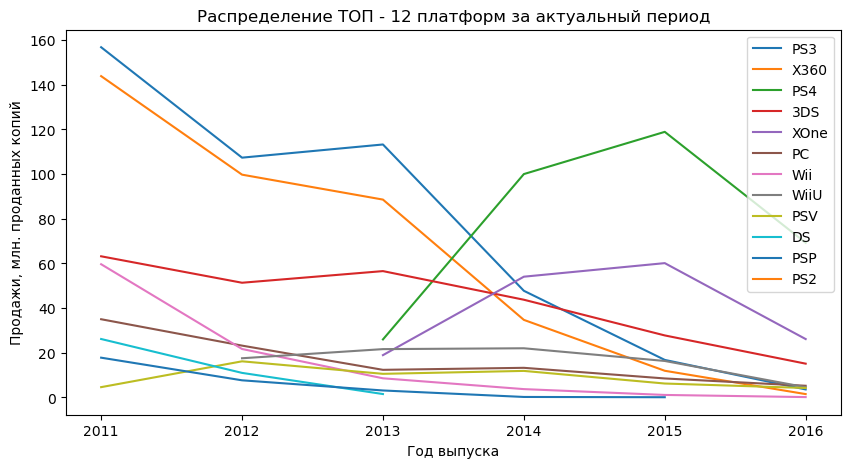

In [45]:
for index in actual_data_list:
    (
    data.query('platform == @index and year_of_release >= 2011')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(figsize = (10, 5), label = index)
    )
    plt.title('Распределение ТОП - 12 платформ за актуальный период')
    plt.xlabel('Год выпуска')
    plt.ylabel('Продажи, млн. проданных копий')
    plt.legend() 

- Как мы можем наблюдать на графике выше - за последние **5** лет лидерами продаж являются **PS3** и **X360** c продажами в **445,57** и **380,38** млн. копий соответственно.
- Однако за последние **2** года первенство удерживают **PS4** и **XOne** с продажами **314,14** и **159,32** млн. копий соответственно, что нетрудно понять, т.к. это следующее поколение консолей тех же производителей.
- Так же отметим, что в целом весь рынок продаж идет на спад, всплеск продаж **PS4** и **XOne** как раз можно объяснить тем, что они стали новинками на рынке, однако падение отмечается по всем направлениям, без исключения.
- На основании вышеизложенного, я считаю перспективными платформами **PS4**, **XOne** и **3DS** т.к. ближе к настоящему периоду времени (2016 год) их продажи наиболее выделяются серди остальных платформ. Так называемый **TOP-3**. 

### 3.4 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [46]:
# делаем срез по индексам из списка актуальных платформ, теперь выбираем наши перспективные платформы
perspective_data_list = actual_data_list[2:5]
perspective_data_list

['PS4', '3DS', 'XOne']

Сделаем срез из датасета с условием, что нам нужны только актуальные платформы и информация за актуальный период:

In [47]:
perspective_data = data.query('platform in @perspective_data_list and year_of_release >= 2011')
perspective_data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4585,Trials Fusion,PS4,2014,Racing,0.13,0.22,0.01,0.07,79.0,7.2,E10+,0.43
6325,LEGO The Hobbit,XOne,2014,Action,0.13,0.12,0.00,0.02,69.0,6.8,E10+,0.27
5746,Tropico 5,PS4,2015,Simulation,0.06,0.16,0.06,0.04,76.0,7.1,T,0.32
14870,The Technomancer,XOne,2016,Role-Playing,0.01,0.01,0.00,0.00,68.0,7.4,M,0.02
5388,Rayman Legends,XOne,2014,Platform,0.13,0.18,0.00,0.03,91.0,7.9,E10+,0.34


Посмотрим на боксплот по глобальным продажам игр в разбивке по платформам

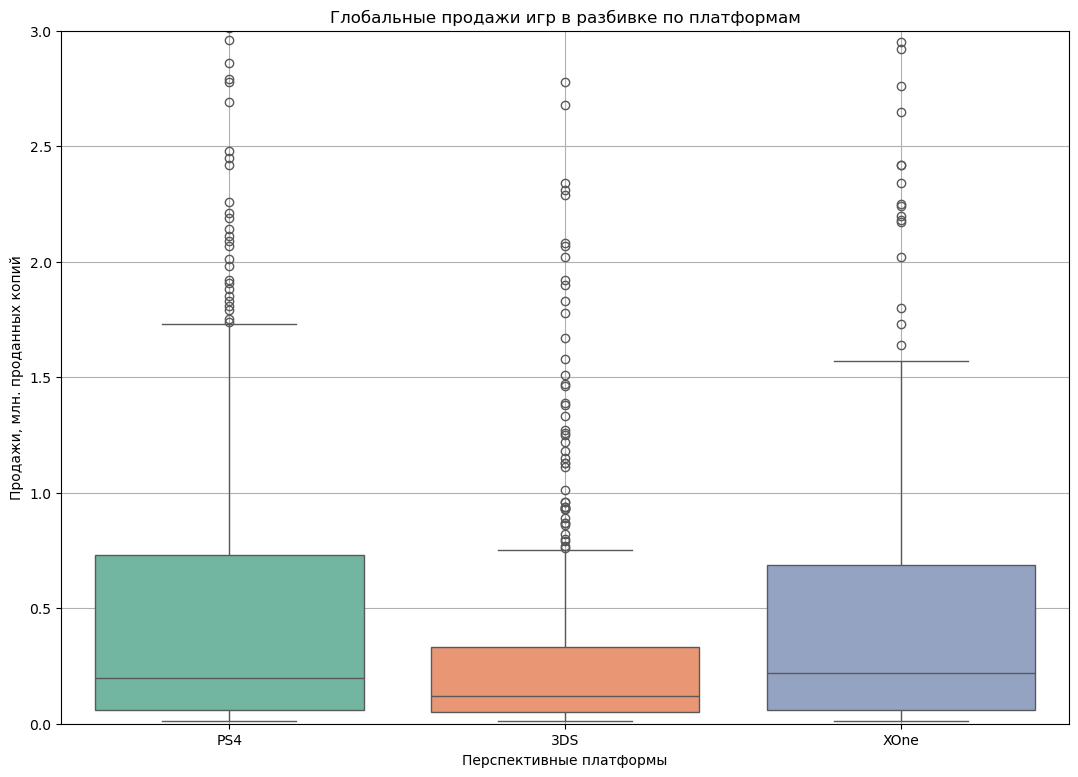

In [48]:
plt.figure(figsize=(13,9))
plt.ylim(0, 3)
sns.boxplot(x = 'platform', y = 'total_sales', data = perspective_data, hue = 'platform', palette = "Set2" );
plt.title("Глобальные продажи игр в разбивке по платформам")
plt.xlabel("Перспективные платформы")
plt.ylabel("Продажи, млн. проданных копий")
plt.grid(True)
plt.show()

Для большей наглядности посчитаем медиану и среднее значение проданных игровых копий:

In [49]:
per_stat = perspective_data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = ['mean','median'])
per_stat = per_stat.rename(columns = {'mean' : 'Среднее', 'median' : 'Медиана', 'total_sales' : 'млн. проданных копий'})
per_stat

,Среднее,Медиана
,млн. проданных копий,млн. проданных копий
platform,,
3DS,0.503535,0.12
PS4,0.801378,0.20
XOne,0.645020,0.22


Видим по боксплотам, что наше распределение скошено вправо, очень наглядно показаны выбросы.\
Очень много глобальных продаж лежат за пределами 'усов', таким образом могут быть отмечены игровые хиты, либо продажи каких либо консольных эксклюзивов. \
Медиана продаж **PS4** и **XOne** почти равны - по **0,2** и **0,22** млн. копий соответственно. 

### 3.5 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Так как большинство продаж, к настоящему времени, имеет платформа `PS4`, то будем строить наши зависимости на примере данной платформы:

In [50]:
# Сделаем срез данных по этой платформе
pl_ps4 = perspective_data.query('platform == "PS4"')
pl_ps4.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


Построим диаграмму рассеяния продаж от отзывов пользователей:

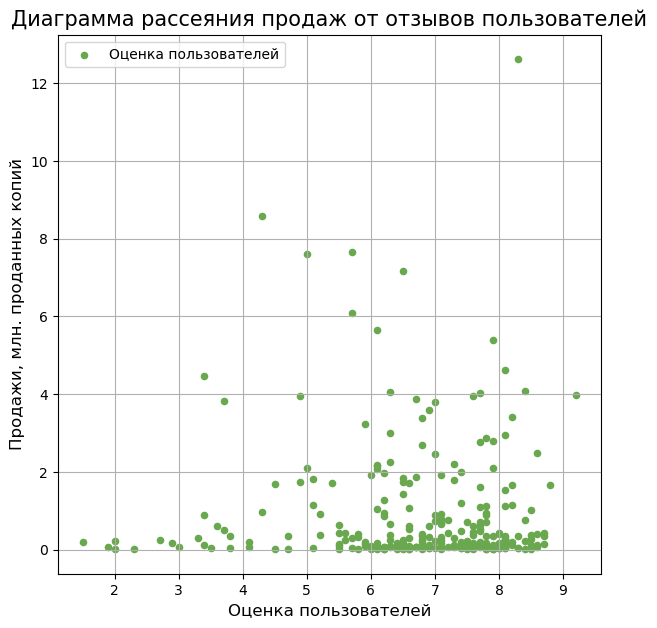

In [51]:
( # построим диаграмму методом .plot()
    pl_ps4
    .plot(kind = 'scatter', x ='user_score', y = 'total_sales', alpha = 1, label = 'Оценка пользователей', grid = True, figsize=(7, 7), color = '#6AA84F')
)
plt.title('Диаграмма рассеяния продаж от отзывов пользователей', size=15)
plt.xlabel('Оценка пользователей', size=12)
plt.ylabel('Продажи, млн. проданных копий', size=12)
plt.show()

Значение корреляции отзывов пользователей и продаж для платформы PS4 равно: 

In [52]:
pl_ps4['total_sales'].corr(pl_ps4['user_score'])

-0.03195711020455643

- Значение корреляции **-0,03** - указывает на **слабую обратную связь** отзывов пользователей и общим количеством продаж, что так же видно на диаграмме рассеяния (точки не складываются в прямую линию).

Построим диаграмму рассеяния продаж от отзывов критиков:

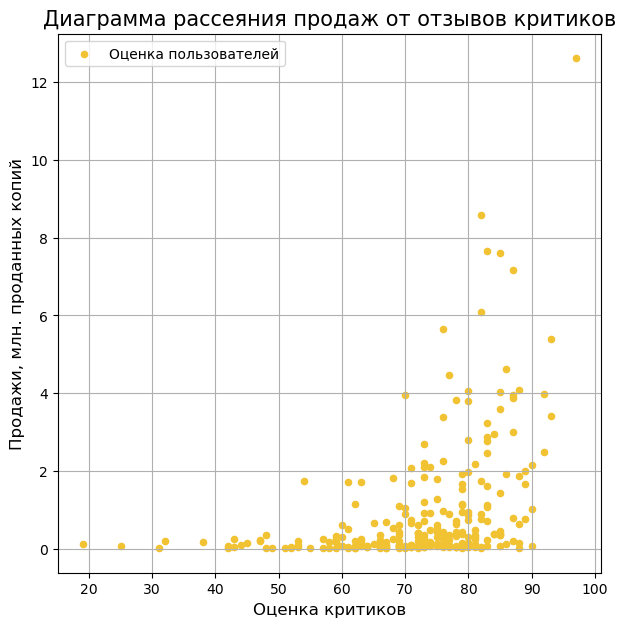

In [53]:
( # построим диаграмму методом .plot()
    pl_ps4
    .plot(kind = 'scatter', x ='critic_score', y = 'total_sales', alpha = 1, label = 'Оценка пользователей', grid = True, figsize=(7, 7), color = '#F1C232')
)
plt.title('Диаграмма рассеяния продаж от отзывов критиков', size=15)
plt.xlabel('Оценка критиков', size=12)
plt.ylabel('Продажи, млн. проданных копий', size=12)
plt.show()

Значение корреляции отзывов критиков и продаж для платформы PS4 равно:

In [54]:
pl_ps4['total_sales'].corr(pl_ps4['critic_score'])

0.40656790206178123

Значение корреляции **0,4** - указывает на **умеренную связь** отзывов критиков и общим количеством продаж, всё-таки к мнению критиков пользователи прислушиваются больше, чем к мнению других пользователей. (Кстати сдесь мы не видим нулевых выбросов, т.к. оставили пропуски в этом столбце без изменений).

А теперь посмотрим, как наши выводы по платформе PS4 соотносятся с данными по другим перспективным платформам и вообще по всем платформум датасета: 

In [55]:
# Значение корреляции отзывов пользователей и продаж для перспективных ТОР-3 платформ равно:
perspective_data['total_sales'].corr(perspective_data['user_score'])

0.042874238612102836

In [56]:
# Значение корреляции отзывов критиков и продаж для перспективных ТОР-3 платформ равно:
perspective_data['total_sales'].corr(perspective_data['critic_score'])

0.37927003308303714

In [57]:
# Значение корреляции отзывов пользователей и продаж для перспективных ВСЕХ платформ равно:
data['total_sales'].corr(data['user_score'])

0.0879353940213567

In [58]:
# Значение корреляции отзывов критиков и продаж для перспективных ВСЕХ платформ равно:
data['total_sales'].corr(data['critic_score'])

0.2454135738507332

- Отслеживая корреляции отзывов пользователей и критиков на разных платформах, мы можем сделать вывод: \
  Что у *перспективных платформ* **умеренная связь** между отзывами критиков и количеством продаж, тогда как *отзывы обычных пользователей* влияние на продажи почти **не оказывают**, а так же - чем больше наша выборка данных, тем меньше значение корреляции отзывов критиков, тогда как корреляция оценок пользователей остается почти без изменений.\
Так же мы видим, по расчету корреляции для **перспективных платформ** и для **всех платформ** в совокупности, что зависимость продаж от *отзывов критиков* **больше**, чем зависимость продаж от *отзывов пользователей*. \
Продажи увеличиваются с увеличением рейтинга отзывов критиков и пользователей.

### 3.6 Посмотрим на общее распределение игр по жанрам

Учитываем общее распределение перспективных платформ:

In [59]:
(
    perspective_data
    .pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median')
    .sort_values(by = 'total_sales', ascending = False)
)

,total_sales
genre,
Shooter,0.880
Sports,0.260
Platform,0.230
Racing,0.230
Role-Playing,0.215
Simulation,0.160
Fighting,0.160
Misc,0.140
Action,0.130


Судя по медианным значениям продаж, больше всего продаются игры в жанре `Shooter` и `Sports`, в то время как минимальные показатели показывают `Adventure` и `Srtategy`.\
Посмотрим какую долю в процентах занимает каждый жанр со стороны среднего значения:

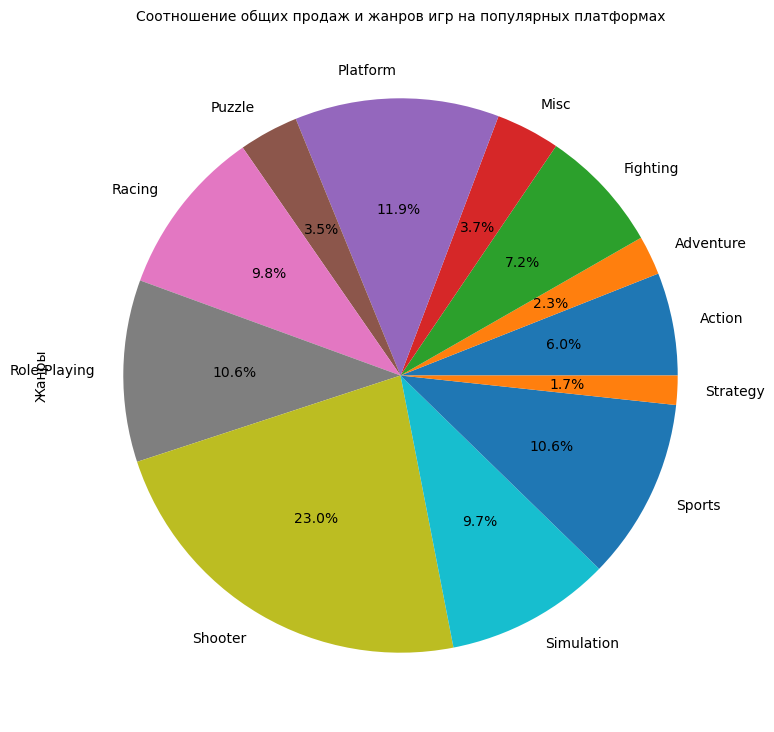

In [60]:
(
    perspective_data
    .groupby('genre')['total_sales']
    .mean()
    .plot(kind='pie', figsize=(9, 9), autopct='%1.1f%%')
)

plt.title('Соотношение общих продаж и жанров игр на популярных платформах', size=10)
plt.ylabel('Жанры')
plt.show()

`Shooter` забирает на себя солидный объем продаж в **23 %**.\
Так же мы можем отметить, что `Adventure` занимает всего 2,3 %.

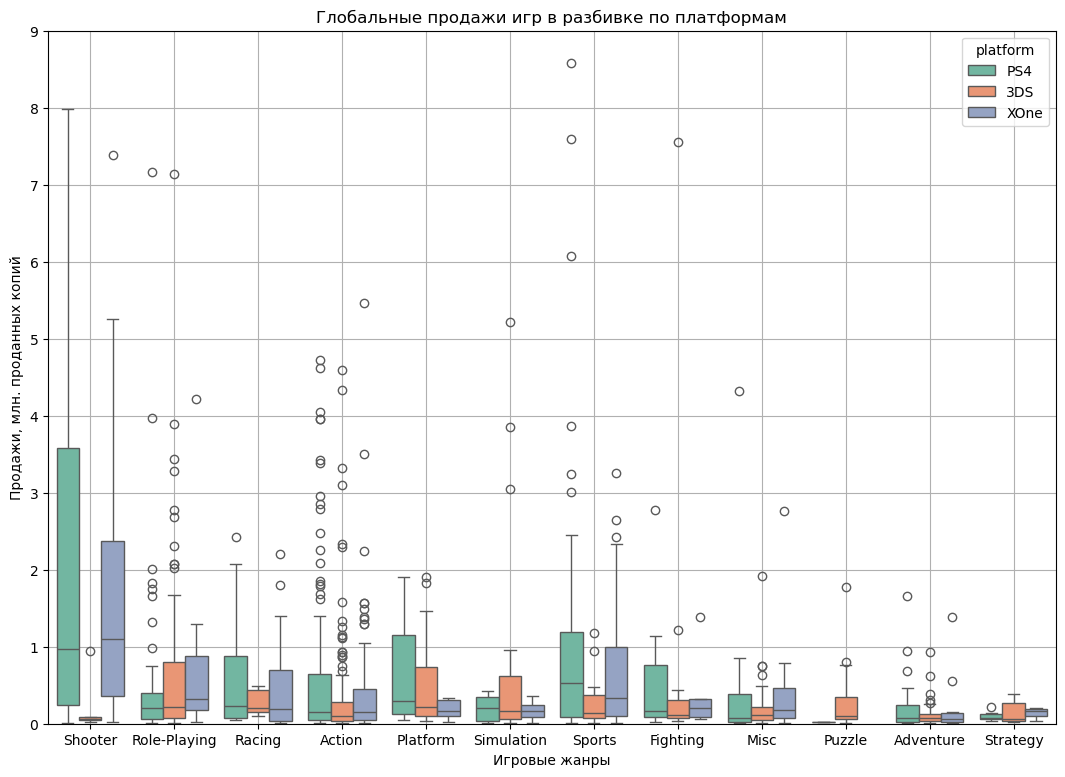

In [84]:
plt.figure(figsize=(13,9))
plt.ylim(0, 9)
sns.boxplot(x = 'genre', y = 'total_sales', data = perspective_data, hue = 'platform', palette = "Set2" );
plt.title("Глобальные продажи игр в разбивке по платформам")
plt.xlabel("Игровые жанры")
plt.ylabel("Продажи, млн. проданных копий")
plt.grid(True)
plt.show()

Боксплот очень наглядно показывает - как лидирует `Shooter` на PS4.

### ВЫВОД:
- Актуальными для нас данными, по моему мнению, являются игры, выпущенные в продажу не позднее **5** лет назад.\
В период 2011-2016 годы - бОльшая часть гейм индустрии идет в онлайн, огромную часть начинает занимать мобильный гейминг с появлением смартфонов, т.к. эти данные у нас не учтены - на нашей гистограмме виден спад.\
Дальше дополнительная реальность и ИИ-ассистенты, а в скором времени и игры от ИИ. Поэтому нет смысла слишком далеко оглядываться назад.

- Средняя продолжительность жизни платформы составляет **6** лет.\
В первую очередь это связано с тем, что одно поколение платформ сменяет другое - легко проследить как продажи **PS** подхватывает **PS2** и дальше на рынок выходит **PS3**.

- За последние 5 лет лидерами продаж являются **PS3** и **X360** c продажами в **445,57** и **380,38** млн. копий соответственно.\
Однако за последние *2* года первенство удерживают **PS4** и **XOne** с продажами **314,14** и **159,32** млн. копий соответственно, что нетрудно понять, т.к. это следующее поколение консолей тех же производителей.\
Так же отметим, что в целом весь рынок продаж идет на спад, всплеск продаж **PS4** и **XOne** как раз можно объяснить тем, что они стали новинками на рынке, однако падение отмечается по всем направлениям, *без исключения*.\
На основании вышеизложенного, я считаю перспективными платформами **PS4**, **XOne** и **3DS** т.к. ближе к настоящему периоду времени (2016 год) их продажи наиболее выделяются серди остальных платформ. 

- Медиана продаж **PS4** и **XOne** почти равны - по **0,2** и **0,22** млн. копий соответственно.

- Отслеживая корреляции отзывов пользователей и критиков на разных платформах, мы можем сделать вывод: \
  Что у *перспективных платформ* **умеренная связь** между отзывами критиков и количеством продаж, тогда как *отзывы обычных пользователей* влияние на продажи почти **не оказывают**, а так же - чем больше наша выборка данных, тем меньше значение корреляции отзывов критиков, тогда как корреляция оценок пользователей остается почти без изменений.\
Так же мы видим, по расчету корреляции для **перспективных платформ** и для **всех платформ** в совокупности, что зависимость продаж от *отзывов критиков* **больше**, чем зависимость продаж от *отзывов пользователей*. \
Продажи увеличиваются с увеличением рейтинга отзывов критиков и пользователей.

- Больше всего продаж приносят игры в жанре **Shooter** и **Sports**, в то время как минимальные показатели показывают **Adventure** и **Srtategy**.
**Shooter** забирает на себя солидный объем продаж в **23 %**.


## Шаг 4. Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

### 4.1 Самые популярные платформы (топ-5)

In [62]:
top_5pl_na = (
    data
    .query('year_of_release >= 2011')
    .pivot_table(index = 'platform', values = ['na_sales','total_sales'], aggfunc = ('median'))
    .sort_values(by = 'na_sales', ascending = False)
    .reset_index()
    .head(5)
)
top_5pl_na['%'] = (top_5pl_na['na_sales'] / top_5pl_na['total_sales']*100).round(2)
top_5pl_na = top_5pl_na.rename(columns = {'platform' : 'Платформа', 'na_sales' : 'Медианные продажи в Северной Америке, млн. копий', 'total_sales' : 'Общие продажи, млн. копий'})
top_5pl_na

,Платформа,"Медианные продажи в Северной Америке, млн. копий","Общие продажи, млн. копий",%
0,X360,0.15,0.27,55.56
1,XOne,0.12,0.22,54.55
2,WiiU,0.11,0.22,50.00
3,Wii,0.08,0.17,47.06
4,PS3,0.06,0.21,28.57


Для пользователей из `Северной Америки` самой популярной является платформа `X360` от `Microsoft`, около **56 %** продаж приходится на эту платформу, а так же более **54 %** на её приемника `XOne`. Американский пользователь выбирает отечественную платформу. \
К примеру, доля продаж `PS3` на американском континенте составляет всего **28,57 %**.

In [63]:
top_5pl_eu = (
    data
    .query('year_of_release >= 2011')
    .pivot_table(index = 'platform', values = ['eu_sales','total_sales'], aggfunc = ('mean'))
    .sort_values(by = 'eu_sales', ascending = False)
    .reset_index()
    .head(5)
)
top_5pl_eu['%'] = (top_5pl_eu['eu_sales'] / top_5pl_eu['total_sales']*100).round(2)
top_5pl_eu = top_5pl_eu.rename(columns = {'platform' : 'Платформа', 'eu_sales' : 'Средние продажи в Европе, млн. копий', 'total_sales' : 'Общие продажи, млн. копий'})
top_5pl_eu

,Платформа,"Средние продажи в Европе, млн. копий","Общие продажи, млн. копий",%
0,PS4,0.359923,0.801378,44.91
1,X360,0.235141,0.763815,30.79
2,PS3,0.230679,0.630212,36.60
3,XOne,0.208866,0.645020,32.38
4,WiiU,0.170952,0.559116,30.58


Мы можем наблюдать, что в среднем, большинство продаж в Европе приходится на `PS4` - **0,36** млн. проданных копий, при **45 %** из общего оборота.  

In [64]:
top_5pl_jp = (
    data
    .query('year_of_release >= 2011')
    .pivot_table(index = 'platform', values = ['jp_sales','total_sales'], aggfunc = ('mean'))
    .sort_values(by = 'jp_sales', ascending = False)
    .reset_index()
    .head(5)
)
top_5pl_jp['%'] = (top_5pl_jp['jp_sales'] / top_5pl_jp['total_sales']*100).round(2)
top_5pl_jp = top_5pl_jp.rename(columns = {'platform' : 'Платформа', 'jp_sales' : 'Средние продажи в Японии, млн. копий', 'total_sales' : 'Общие продажи, млн. копий'})
top_5pl_jp

,Платформа,"Средние продажи в Японии, млн. копий","Общие продажи, млн. копий",%
0,3DS,0.196523,0.503535,39.03
1,WiiU,0.088503,0.559116,15.83
2,PSP,0.077051,0.092981,82.87
3,PS3,0.069859,0.630212,11.08
4,PSV,0.050909,0.125431,40.59


Японцы, как и американцы - предпочитают отечественный продукт, судя по ТОР-5 их популярных платформ - все они от японского производителя.\
В среднем, большинство проданных копий у платформы `3DS` - **0,197** млн. копий, одновременно с более чем **83 %** продаж на платформе `PSP`. 

### 4.2 Самые популярные жанры (топ-5)

In [65]:
top_5genre_na = (
    data
    .query('year_of_release >= 2011')
    .pivot_table(index = 'genre', values = ['na_sales','total_sales'], aggfunc = ('mean'))
    .sort_values(by = 'na_sales', ascending = False)
    .reset_index()
    .head(5)
)
top_5genre_na['%'] = (top_5genre_na['na_sales'] / top_5genre_na['total_sales']*100).round(2)
top_5genre_na = top_5genre_na.rename(columns = {'genre' : 'Жанр', 'na_sales' : 'Средние продажи в Северной Америке, млн. копий', 'total_sales' : 'Общие продажи, млн. копий'})
top_5genre_na

,Жанр,"Средние продажи в Северной Америке, млн. копий","Общие продажи, млн. копий",%
0,Shooter,0.590973,1.224650,48.26
1,Platform,0.313770,0.726885,43.17
2,Sports,0.280155,0.611186,45.84
3,Fighting,0.198931,0.420755,47.28
4,Misc,0.185840,0.371787,49.99


Больше всего продаж в Северной Америке приносит жанр `Shooter` c **0,59** млн. проданных копий с долей в **48 %** от общемировых продаж этого жанра.\
Однако, наибольшую долю от мирового рынка продаж в своем жанре занимает `Misc` с **50 %** от общих продаж по миру в этом регионе. 

In [66]:
top_5genre_eu = (
    data
    .query('year_of_release >= 2011')
    .pivot_table(index = 'genre', values = ['eu_sales','total_sales'], aggfunc = ('mean'))
    .sort_values(by = 'eu_sales', ascending = False)
    .reset_index()
    .head(5)
)
top_5genre_eu['%'] = (top_5genre_eu['eu_sales'] / top_5genre_eu['total_sales']*100).round(2)
top_5genre_eu = top_5genre_eu.rename(columns = {'genre' : 'Жанр', 'eu_sales' : 'Средние продажи в Европе, млн. копий', 'total_sales' : 'Общие продажи, млн. копий'})
top_5genre_eu

,Жанр,"Средние продажи в Европе, млн. копий","Общие продажи, млн. копий",%
0,Shooter,0.449909,1.224650,36.74
1,Platform,0.246475,0.726885,33.91
2,Sports,0.228015,0.611186,37.31
3,Racing,0.225444,0.490611,45.95
4,Action,0.156911,0.439559,35.70


Первое место по средним продажам в Европе занимает всё тот же `Shooter` cо **0,45** млн. проданных копий с долей в **36,74 %** от общемировых продаж этого жанра.
Однако, наибольшую долю от мирового рынка продаж в своем жанре занимает `Rasing` с **46 %** от общих продаж по миру в этом регионе.

In [67]:
top_5genre_jp = (
    data
    .query('year_of_release >= 2011')
    .pivot_table(index = 'genre', values = ['jp_sales','total_sales'], aggfunc = ('mean'))
    .sort_values(by = 'jp_sales', ascending = False)
    .reset_index()
    .head(5)
)
top_5genre_jp['%'] = (top_5genre_jp['jp_sales'] / top_5genre_jp['total_sales']*100).round(2)
top_5genre_jp = top_5genre_jp.rename(columns = {'genre' : 'Жанр', 'jp_sales' : 'Продажи в Японии, млн. копий', 'total_sales' : 'Общие продажи, млн. копий'})
top_5genre_jp

,Жанр,"Продажи в Японии, млн. копий","Общие продажи, млн. копий",%
0,Role-Playing,0.171763,0.528237,32.52
1,Platform,0.099426,0.726885,13.68
2,Simulation,0.085588,0.369559,23.16
3,Fighting,0.077862,0.420755,18.51
4,Action,0.050134,0.439559,11.41


Первое место по средним продажам в Японии занимает жанр `Role-Playing` c **0,17** млн. проданных копий с долей в **32,52 %** от общемировых продаж этого жанра, что является максимальным для данного региона.  

### 4.3 Влияние рейтинга ESRB на продажи в отдельных регионах

Продолжаем использовать сводные таблицы:\
Согласно википедии, привожу расшифровку классификаций рейтинга организации **ESRB**:\
«**EC**» («**Early childhood**») — «Для детей младшего возраста»: Игра подходит для детей от *3* лет\
«**E**» («**Everyone**») — «Для всех»: Содержание вполне подходит для возрастной категории от *6* лет.\
«**E10+**» («**Everyone 10 and older**») — «Для всех от *10* лет и старше».\
«**T**» («**Teen**») — «Подросткам»: Игра подходит для лиц от *13* лет.\
«**M**» («**Mature**») — «Для взрослых»: Материалы игры не подходят для подростков младше *17* лет.\
«**AO**» («**Adults Only 18+**») — «Только для взрослых»: Содержание игры только для взрослых старше *18* лет.\
«**RP**» («**Rating Pending**») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

In [68]:
top_5rating_na = (
    data
    .query('year_of_release >= 2011')
    .pivot_table(index = 'rating', values = ['na_sales','total_sales'], aggfunc = ('mean'))
    .sort_values(by = 'na_sales', ascending = False)
    .reset_index()
    .head(5)
)
top_5rating_na['%'] = (top_5rating_na['na_sales'] / top_5rating_na['total_sales']*100).round(2)
top_5rating_na = top_5rating_na.rename(columns = {'rating' : 'Рейтинг', 'na_sales' : 'Продажи в Северной Америке, млн. копий', 'total_sales' : 'Общие продажи, млн. копий'})
top_5rating_na

,Рейтинг,"Продажи в Северной Америке, млн. копий","Общие продажи, млн. копий",%
0,M,0.495900,1.072042,46.26
1,EC,0.420000,0.450000,93.33
2,E,0.275802,0.631167,43.70
3,E10+,0.258158,0.506272,50.99
4,T,0.177451,0.412386,43.03


Как мы видим, из таблицы выше - в Северной Америке большинство игр продается с рейтингом «**M**», со средним результатом в **0,49** млн. проданных копий и **46,26** % от общих продаж данного рейтинга по миру. \
Наибольшую долю от мирового рынка в Америке занимает рейтинг «**ЕС**» в количестве **93%**.

In [69]:
top_5rating_eu = (
    data
    .query('year_of_release >= 2011')
    .pivot_table(index = 'rating', values = ['eu_sales','total_sales'], aggfunc = ('mean'))
    .sort_values(by = 'eu_sales', ascending = False)
    .reset_index()
    .head(5)
)
top_5rating_eu['%'] = (top_5rating_eu['eu_sales'] / top_5rating_eu['total_sales']*100).round(2)
top_5rating_eu = top_5rating_eu.rename(columns = {'rating' : 'Рейтинг', 'eu_sales' : 'Продажи в Европе, млн. копий', 'total_sales' : 'Общие продажи, млн. копий'})
top_5rating_eu

,Рейтинг,"Продажи в Европе, млн. копий","Общие продажи, млн. копий",%
0,M,0.402347,1.072042,37.53
1,E,0.229692,0.631167,36.39
2,E10+,0.171053,0.506272,33.79
3,T,0.135000,0.412386,32.74
4,unknown,0.068273,0.241499,28.27


В Европе большинство игр всё так же продается с рейтингом «**M**», со средним результатом в **0,4** млн. проданных копий и **37,53** % от общих продаж данного рейтинга по миру. Так же рейтинг «**M**» занимает наибольшую долю в Европе от мирового рынка. 

In [70]:
top_5rating_jp = (
    data
    .query('year_of_release >= 2011')
    .pivot_table(index = 'rating', values = ['jp_sales','total_sales'], aggfunc = ('mean'))
    .sort_values(by = 'jp_sales', ascending = False)
    .reset_index()
    .head(5)
)
top_5rating_jp['%'] = (top_5rating_jp['jp_sales'] / top_5rating_jp['total_sales']*100).round(2)
top_5rating_jp = top_5rating_jp.rename(columns = {'rating' : 'Рейтинг', 'jp_sales' : 'Продажи в Японии, млн. копий', 'total_sales' : 'Общие продажи, млн. копий'})
top_5rating_jp

,Рейтинг,"Продажи в Японии, млн. копий","Общие продажи, млн. копий",%
0,unknown,0.080919,0.241499,33.51
1,E,0.059449,0.631167,9.42
2,T,0.054205,0.412386,13.14
3,M,0.042026,1.072042,3.92
4,E10+,0.024627,0.506272,4.86


Большее количество проданных игр в Японии имеет обезличенный рейтинг, поэтому обратим внимание на доставерную информацию о рейтинге, а именно:\
Большинство игр продается с рейтингом «**Е**», со средним результатом в **0,06** млн. проданных копий и **9,42** % от общих продаж игр данного рейтинга по миру.\
Игры с рейтингом «**Т**» занимают наибольшую долю  **13,14 %** в данном регионе. 

### ВЫВОД:
Рассматривая самые популярные платформы по регионам, мы выяснили:

- Для пользователей из `Северной Америки` самой популярной является платформа `X360` от `Microsoft`, около **56 %** продаж приходится на эту платформу, а так же более **54 %** на её приемника `XOne`. Американский пользователь выбирает отечественную платформу. 
- В среднем, большинство продаж в Европе приходится на `PS4` - **0,36** млн. проданных копий, при **45 %** из общего оборота.
- Японцы, как и американцы - предпочитают отечественный продукт, судя по ТОР-5 их популярных платформ - все они от японского производителя.\
В среднем, большинство проданных копий у платформы `3DS` - **0,197** млн. копий, одновременно с более чем **83 %** продаж на платформе `PSP`. 

Рассматривая самые популярные жанры по регионам, мы выяснили:
- Больше всего продаж в Северной Америке приносит жанр `Shooter` c **0,59** млн. проданных копий с долей в **48 %** от общемировых продаж этого жанра.\
Однако, наибольшую долю от мирового рынка продаж в своем жанре занимает `Misc` с **50 %** от общих продаж по миру в этом регионе.
- Первое место по средним продажам в Европе занимает всё тот же `Shooter` cо **0,45** млн. проданных копий с долей в **36,74 %** от общемировых продаж этого жанра.\
Однако, наибольшую долю от мирового рынка продаж в своем жанре занимает `Rasing` с **46 %** от общих продаж по миру в этом регионе.
- Первое место по средним продажам в Японии занимает жанр `Role-Playing` c **0,17** млн. проданных копий с долей в **32,52 %** от общемировых продаж этого жанра, что является максимальным для данного региона.  

Рассматривая самые влияние рейтинга **ESRB** по регионам, мы выяснили:
- Как мы видим, из таблицы выше - в Северной Америке большинство игр продается с рейтингом «**M**», со средним результатом в **0,49** млн. проданных копий и **46,26** % от общих продаж данного рейтинга по миру. \
Наибольшую долю от мирового рынка в Америке занимает рейтинг «**ЕС**» в количестве **93%**.
- В Европе большинство игр всё так же продается с рейтингом «**M**», со средним результатом в **0,4** млн. проданных копий и **37,53** % от общих продаж данного рейтинга по миру. Так же рейтинг «**M**» занимает наибольшую долю в Европе от мирового рынка.
- Большее количество проданных игр в Японии имеет обезличенный рейтинг, поэтому обратим внимание на доставерную информацию о рейтинге, а именно:\
Большинство игр продается с рейтингом «**Е**», со средним результатом в **0,06** млн. проданных копий и **9,42** % от общих продаж игр данного рейтинга по миру.\
Игры с рейтингом «**Т**» занимают наибольшую долю  **13,14 %** в данном регионе. 

Таким образом, мы видим, что самыми "играющими" регионами является `Северная Америка` и `Европа`, предпочитающие продукцию XBOX и PlayStation, им нравятся схожие жанры, например `Shooter` и доминирующим рейтингом игр у них является `"М"`, что говорит о том, что геймингом занимаются люди старше 17 лет. В японском регионе мы наблюдаем, что само количество играющих людей меньше (как и количество проданных копий игр), и популярный возрастной рейтинг ниже **(Е)**, что говорит нам о том, что в Японии в игры играют дети от 6 до 10 лет. А нам как раз для нашего исследования важно, чтобы в игры играли платежеспособные пользователи. 

## Шаг 5. Проверим гипотезы

### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Выдвигаем гипортезы: 
- Н0: Средний *пользовательский* рейтинг платформы *XOne* **равен** среднему *пользовательскому* рейтингу платформы *PC*.\
\begin{alignat}{2}
H (0): R^{(XOne)}&= R^{(PC)}
\end{alignat}

- Н1: Средний *пользовательский* рейтинг платформы *XOne* **больше** среднего *пользовательского* рейтинга платформы *PC*.\
\begin{alignat}{2}
H (1): R^{(XOne)}&> R^{(PC)}
\end{alignat}

  Уровень статистической значимости alpha = 0.05

В столбце `user_score` мы заменили пропущенные значения оценок и `tbd` на 0, что может негативно повлиять на расчет (мы искуственно сместили среднюю оценку пользователей к нулю), отбросим нулевые оценки в новом срезе:

In [71]:
xbox = data.query('platform == "XOne" and user_score > 0 and year_of_release >= 2011')
pc = data.query('platform == "PC" and user_score > 0 and year_of_release >= 2011')

In [72]:
# Вызовем описательную функцию .describe() для просмотра размера выборки
xbox['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [73]:
# Вызовем описательную функцию .describe() для просмотра размера выборки
pc['user_score'].describe()

count    307.000000
mean       6.451792
std        1.611303
min        1.400000
25%        5.550000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

Видим, что выборки не равны в размерах, посмотрим на значения дисперсий: 

In [74]:
# посмотрим значения дисперсий оценок пользователей для xbox:
np.var(xbox['user_score'])

1.8965188383045533

In [75]:
# посмотрим значения дисперсий оценок пользователей для PC:
np.var(pc['user_score'])

2.587838809960847

От значений дисперсии зависит параметр `equal_var`, а сама дисперсия показывает - насколько далеко набор чисел разбросан от их среднего значения.

In [76]:
# так как у нас имеются две независимые выборки - проверяем гипотезу о равенстве средних двух генеральных совокупностях 
alpha = 0.05
results = st.ttest_ind(
    xbox['user_score'],
    pc['user_score'], 
    equal_var = False,
    alternative = 'greater')
# параметр equal_var = False, так как дисперсии генеральных сопокупностей не равны
# параметр greater говорит о том, что будет проверена правосторонняя альтернативная теория

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 0.30653561238192384
Не удалось отвергнуть нулевую гипотезу


Так как нулевая гипотеза *не отвергнута* - есть основания утверждать, что средний пользовательский рейтинг платформы **XOne** равен среднему пользовательскому рейтингу платформы **PC**, при уровне статистической значимости **5 %**. 

### 5.2 Средние пользовательские рейтинги жанров Action и Sports разные

Выдвигаем гипортезы: 
- Н0: Средний *пользовательский* рейтинг жанра *Action* **равен** среднему *пользовательскому* рейтингу жанра *Sports*.\
\begin{alignat}{2}
H (0): R^{(Action)}&= R^{(Sports)}
\end{alignat}

- Н1: Средний *пользовательский* рейтинг жанра *Action* **не равен** среднему *пользовательского* рейтингу жанра *Sports*.\
\begin{alignat}{2}
H (1): R^{(Action)}& \not>\ R^{(Sports)}
\end{alignat}

  Уровень статистической значимости alpha = 0.05

Также, как и в предыдущем пункте, сделаем срез данных по нашим искомым данным: 

In [77]:
action = data.query('genre == "Action" and user_score > 0 and year_of_release >= 2011')
sports = data.query('genre == "Sports" and user_score > 0 and year_of_release >= 2011')

In [78]:
# Вызовем описательную функцию .describe() для просмотра размера выборки
action['user_score'].describe()

count    664.000000
mean       6.775904
std        1.346060
min        1.600000
25%        6.100000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [79]:
# Вызовем описательную функцию .describe() для просмотра размера выборки
sports['user_score'].describe()

count    245.000000
mean       5.651429
std        1.701244
min        0.200000
25%        4.400000
50%        6.000000
75%        6.900000
max        8.800000
Name: user_score, dtype: float64

Видим, что выборки не равны в размерах, посмотрим на значения дисперсий:

In [80]:
# посмотрим значения дисперсий оценок пользователей для жанра action:
np.var(action['user_score'])

1.8091482798664522

In [81]:
# посмотрим значения дисперсий оценок пользователей для жанра sports:
np.var(sports['user_score'])

2.8824163265306106

Дисперсии не равны, значит параметр `equal_var` выставляем в значение `False`.  

In [82]:
# так как у нас имеются две независимые выборки - проверяем гипотезу о равенстве средних двух генеральных совокупностях 
alpha = 0.05
results = st.ttest_ind(
    action['user_score'],
    sports['user_score'], 
    equal_var = False,
    alternative = 'two-sided')
# параметр equal_var = False, так как дисперсии генеральных сопокупностей не равны
# параметр two-sided говорит о том, что будет проверена двухсторонняя альтернативная теория

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 1.1195647244704726e-18
Отвергаем нулевую гипотезу


Так как нулевая гипотеза *отвергнута* - есть основания утверждать, что средний пользовательский рейтинг жанра **Action** не равен среднему пользовательскому рейтингу жанра **Sports**, при уровне статистической значимости **5 %**.

### ВЫВОД:
Нулевая и альтернативная гипотеза сформированы исходя из задания, т.к. у нас в исходных данных имеются две независимые выборки - применяем метод `.ttest_ind`, если в первом случае альтернативная теория проверяется на большее значение, то проверяется правосторонняя альтернативная теория с параметром `alternative = 'greater'`, в втором случае проверяется равенство/неравенство, поэтому мы используем параметр `alternative = 'two-sided'`. \
При проверке гипотез, мы выяснили:\
Есть основания утверждать, что средний пользовательский рейтинг платформы **XOne** *равен* среднему пользовательскому рейтингу платформы **PC**, при уровне статистической значимости **5 %**. \
А так же есть основания утверждать, что средний пользовательский рейтинг жанра **Action** *не равен* среднему пользовательскому рейтингу жанра **Sports**, при уровне статистической значимости **5 %**.


# ОБЩИЙ ВЫВОД:
В процессе исследования данных интернет-магазина **"Стримчик"** мы проделали следующие шаги: 
- Изучена общая информация о датафрейме:
Датафрейм `games.csv` на **11** колонок и **16 715** строк, сразу отметили, что в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_score`, `Rating` имеются пропущенные значения, так же видно, что названия столбцов указаны не корректно.

На этапе предобработки данных:
- Привели названия столбцов к нижнему регистру;
- Проверили датафрейм на наличие явных и неявных дубликатов, дубликаты не обнаружены;

Обработали пропущенные значения в столбцах: 
- В столбцах `name` и `genre` удалено **2** строки, что составляет **0,01 %** от общего количества строк. 
- В столбце `year_of_release` удалено **269** строки, что составляет **1,6 %** от общего количества строк.
- В столбце `critic_score` оставлено **8461** пропущенное значение, что составляет **51,5 %** от общего количества строк. Заменить пропуски на среднее значение или медиану мы не можем.  
- В столбце `user_score` оставлено **8981** пропущенное значение, что составляет **53,7 %** от общего количества строк.\
В данном столбце `tbd` преобразованы в *NaN*.
- В столбце `rating` обработано **6766** пропущенное значение, что составляет **40,5 %** от общего количества строк.\
По аналогии с предыдущими столбцами заменить на медиану или среднее мы не можем, поэтому пропуски заменены значением `unknown`.

Пропуски в данных могли появиться в следствие технической ошибки при выгрузке/загрузке данных и обработки информации из разных открытых источников, а так же не стоит упускать значение человеческого фактора - могли быть взяты попросту неактуальные источники данных или заведомо неполные. 

- Добавили столбец с суммарными продажами игр по всем регионам.
- Произвели поиск неявных дубликатов по совпадению названия, платформы и года релиза - удалена одна дублирующаяся строка. 

На этапе исследовательского анализа данных выяснили, что:
- Актуальными для нас данными, по моему мнению, являются игры, выпущенные в продажу не позднее **5** лет назад.\
В период 2011-2016 годы - бОльшая часть гейм индустрии идет в онлайн, огромную часть начинает занимать мобильный гейминг с появлением смартфонов, т.к. эти данные у нас не учтены - на нашей гистограмме виден спад.\
Дальше дополнительная реальность и ИИ-ассистенты, а в скором времени и игры от ИИ. Поэтому нет смысла слишком далеко оглядываться назад.

- Средняя продолжительность жизни платформы составляет **6** лет.\
В первую очередь это связано с тем, что одно поколение платформ сменяет другое - легко проследить как продажи **PS** подхватывает **PS2** и дальше на рынок выходит **PS3**.

- За последние 5 лет лидерами продаж являются **PS3** и **X360** c продажами в **445,57** и **380,38** млн. копий соответственно.\
Однако за последние *2* года первенство удерживают **PS4** и **XOne** с продажами **314,14** и **159,32** млн. копий соответственно, что нетрудно понять, т.к. это следующее поколение консолей тех же производителей.\
Так же отметим, что в целом весь рынок продаж идет на спад, всплеск продаж **PS4** и **XOne** как раз можно объяснить тем, что они стали новинками на рынке, однако падение отмечается по всем направлениям, *без исключения*.\
На основании вышеизложенного, я считаю перспективными платформами **PS4**, **XOne** и **3DS** т.к. ближе к настоящему периоду времени (2016 год) их продажи наиболее выделяются серди остальных платформ. 

- Медиана продаж **PS4** и **XOne** почти равны - по **0,2** и **0,22** млн. копий соответственно.

- Отслеживая корреляции отзывов пользователей и критиков на разных платформах, мы можем сделать вывод: \
  Что у *перспективных платформ* **умеренная связь** между отзывами критиков и количеством продаж, тогда как *отзывы обычных пользователей* влияние на продажи почти **не оказывают**, а так же - чем больше наша выборка данных, тем меньше значение корреляции отзывов критиков, тогда как корреляция оценок пользователей остается почти без изменений.\
Так же мы видим, по расчету корреляции для **перспективных платформ** и для **всех платформ** в совокупности, что зависимость продаж от *отзывов критиков* **больше**, чем зависимость продаж от *отзывов пользователей*. \
Продажи увеличиваются с увеличением рейтинга отзывов критиков и пользователей.

- Больше всего продаж приносят игры в жанре **Shooter** и **Sports**, в то время как минимальные показатели показывают **Adventure** и **Srtategy**.
**Shooter** забирает на себя солидный объем продаж в **23 %**.

Составили портрет пользователя каждого региона:
- Самыми "играющими" регионами является `Северная Америка` и `Европа`, предпочитающие продукцию XBOX и PlayStation, им нравятся схожие жанры, например `Shooter` и доминирующим рейтингом игр у них является `"М"`, что говорит о том, что геймингом занимаются люди старше 17 лет. В японском регионе мы наблюдаем, что само количество играющих людей меньше (как и количество проданных копий игр), и популярный возрастной рейтинг ниже **(Е)**, что говорит нам о том, что в Японии в игры играют дети от 6 до 10 лет. А нам как раз для нашего исследования важно, чтобы в игры играли платежеспособные пользователи.
  
Рассматривая самые популярные платформы по регионам, мы выяснили:
- Для пользователей из `Северной Америки` самой популярной является платформа `X360` от `Microsoft`, около **56 %** продаж приходится на эту платформу, а так же более **54 %** на её приемника `XOne`. Американский пользователь выбирает отечественную платформу. 
- В среднем, большинство продаж в Европе приходится на `PS4` - **0,36** млн. проданных копий, при **45 %** из общего оборота.
- Японцы, как и американцы - предпочитают отечественный продукт, судя по ТОР-5 их популярных платформ - все они от японского производителя.\
В среднем, большинство проданных копий у платформы `3DS` - **0,197** млн. копий, одновременно с более чем **83 %** продаж на платформе `PSP`. 

Рассматривая самые популярные жанры по регионам, мы выяснили:
- Больше всего продаж в Северной Америке приносит жанр `Shooter` c **0,59** млн. проданных копий с долей в **48 %** от общемировых продаж этого жанра.\
Однако, наибольшую долю от мирового рынка продаж в своем жанре занимает `Misc` с **50 %** от общих продаж по миру в этом регионе.
- Первое место по средним продажам в Европе занимает всё тот же `Shooter` cо **0,45** млн. проданных копий с долей в **36,74 %** от общемировых продаж этого жанра.\
Однако, наибольшую долю от мирового рынка продаж в своем жанре занимает `Rasing` с **46 %** от общих продаж по миру в этом регионе.
- Первое место по средним продажам в Японии занимает жанр `Role-Playing` c **0,17** млн. проданных копий с долей в **32,52 %** от общемировых продаж этого жанра, что является максимальным для данного региона.  

Рассматривая самые влияние рейтинга **ESRB** по регионам, мы выяснили:
- Как мы видим, из таблицы выше - в Северной Америке большинство игр продается с рейтингом «**M**», со средним результатом в **0,49** млн. проданных копий и **46,26** % от общих продаж данного рейтинга по миру. \
Наибольшую долю от мирового рынка в Америке занимает рейтинг «**ЕС**» в количестве **93%**.
- В Европе большинство игр всё так же продается с рейтингом «**M**», со средним результатом в **0,4** млн. проданных копий и **37,53** % от общих продаж данного рейтинга по миру. Так же рейтинг «**M**» занимает наибольшую долю в Европе от мирового рынка.
- Большее количество проданных игр в Японии имеет обезличенный рейтинг, поэтому обратим внимание на доставерную информацию о рейтинге, а именно:\
Большинство игр продается с рейтингом «**Е**», со средним результатом в **0,06** млн. проданных копий и **9,42** % от общих продаж игр данного рейтинга по миру.\
Игры с рейтингом «**Т**» занимают наибольшую долю  **13,14 %** в данном регионе. 

Выдвинули и проверили гипотезы, по которым у нас:\
Есть основания утверждать, что средний пользовательский рейтинг платформы **XOne** *равен* среднему пользовательскому рейтингу платформы **PC**, при уровне статистической значимости **5 %**. \
А так же есть основания утверждать, что средний пользовательский рейтинг жанра **Action** *не равен* среднему пользовательскому рейтингу жанра **Sports**, при уровне статистической значимости **5 %**.

**ЗАКЛЮЧЕНИЕ**\
Для увеличения прибыли руководству интернет-магазина **"Стримчик"** необходимо уделить большее внимание пользователем из **Северной Америки** и **Европы**, проводить рекламные кампании на игры с жанром **Shooter** и **Platform**, в которых нужно ориентироваться на пользователей старше 17 лет, которые подходят под категорию игр с рейтингом **"М"** (для взрослых)и используют платформамы **PS4** и **XOne**. 